# Exploring the Data

Let's start with importing the necessary libaries, reading in the data, and checking out the dataset.

In [1]:
# Import libraries necessary for this project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
# Image settings for visualization
from IPython.core.pylabtools import figsize

figsize(12, 9)

sns.set()

In [3]:
# loading the database
market = pd.read_csv('mercado.csv', index_col='id')

In [4]:
# getting to know the size of the dataset 
market.shape

(462298, 181)

In [5]:
# let's take a look in the dataset
market.head()

,Unnamed: 0,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,2,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,3,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,4,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
market = market.drop(columns =['Unnamed: 0'], axis = 1)

In [7]:
def create_status(df):
    """create a status dataset giving the column name, type, sum of NaNs and percentage of NaNs 
    Args:
    
    df: dataset
    
    Return:
    
    status: dataset (columns: column names of df,
                    type: type of the data in each column of df,
                    Sum of NaN: sum of NaN values for each column in df,
                    NaN%: percentage of NaN values for each column in df)
    """
    
    status= pd.DataFrame({'columns': df.columns,
                          'type': df.dtypes,
                          'Sum of NaN': df.isnull().sum(),
                          'NaN%': df.isnull().sum()/len(df)})
    return status

In [8]:
status_market = create_status(market)
status_market.reindex(columns=['type','Sum of NaN','NaN%']).sort_values(by = 'Sum of NaN', ascending=False).head(40)

,type,Sum of NaN,NaN%
grau_instrucao_macro_desconhecido,float64,462298,1.000000
qt_alteracao_socio_total,float64,462298,1.000000
qt_alteracao_socio_90d,float64,462298,1.000000
qt_alteracao_socio_180d,float64,462298,1.000000
qt_alteracao_socio_365d,float64,462298,1.000000
coligada_mais_antiga_baixada,float64,462162,0.999706
idade_media_coligadas_baixadas,float64,462162,0.999706
coligada_mais_nova_baixada,float64,462162,0.999706
vl_total_veiculos_antt,float64,462122,0.999619
vl_total_tancagem,float64,462018,0.999394


* Here we can see that we have a large number of features with a NaN percentage close to 100%
* Let's create a base line for that

# Feature Selection
## First Round
### The selected features in the filter list were chosen as follows:
* Features with an amount of NaN values greater than 25% have been removed.
* As a result, there was a reduction from 180 to 45 columns. 75% reduction in columns.
* A random sample was taken containing 10% of the number of lines in the market base.
* This sample was used to search for the largest correlated features using the pandas proifiling tool.
* For this, the sample database was analyzed in a notebook  to assist in google colab for greater agility in the analysis.
* The features with the highest correlation were listed in the filter variable and will be further analyzed below.

In [9]:
# working with an auxiliary dataset
aux_market = market

In [10]:
# organizing the NaN values
mer_na_sorted = market.isna().sum().sort_values(ascending=False)

In [11]:
# creating a baseline
list_to_drop = []
for column,quantity_na in mer_na_sorted.items():
    if (quantity_na/aux_market.shape[0]) > 0.25:
        list_to_drop.append(column)
        
print(f'Number of features to drop: {len(list_to_drop)}')

Number of features to drop: 136


* I set a baseline of features with a NaN percentage higher than 0.25 % should be dropped
* So I'll need to drop 136 features

In [12]:
#dropping the features
aux_market = aux_market.drop(list_to_drop, axis = 1)

In [13]:
aux_market.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,...,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,...,NATAL,True,2.0,2.0,0.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,...,TERESINA,True,1.0,1.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,...,MANAUS,True,1.0,1.0,0.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,...,MANAUS,True,1.0,1.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,...,NATAL,True,1.0,1.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


## Analysis in Google Colaboratory.

In this part, I collected a small sample of the dataset, so that I could analyse it better in Google Colab usin the pandas profiling tool.

In [14]:
sample_market = aux_market.sample(frac=.10)

In [15]:
sample_market.to_csv('sample_mercado.csv')

### Features Selected

In [16]:
filter1 = ['de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro', 'de_ramo', 'setor', 'fl_rm', 'nm_divisao', 
          'nm_segmento', 'sg_uf_matriz', 'nm_meso_regiao', 'nm_micro_regiao','qt_socios']

### Descrição das features escolhidas com base do dicionário de dados.

* **natureza_juridica_macro**: character, juridic nature of the company.
* **sg_uf**: character, initials of the name of the state of the company.
* **natureza_juridica_macro**: a macro legal category for "natureza jurídica".
* **de_ramo**: a macro legal category for "natureza jurídica".
* **setor**: : character, economic sector of the company (Industry, Services, Agrobusiness, Etc.).
* **fl_rm**: : character, true if the company address is located in an metropolitan area
* **nm_divisao**: character, name description of the primary economic activity of the company
* **nm_segmento**: character, name description of the primary economic activity cluster of the company
* **sg_uf_matriz**: character, state of the main office location.
* **nm_meso_regiao**: character, name of the meso region where the company is located.
* **nm_micro_regiao**: character, name of the micro region where the company is located.
* **qt_socios**: : integer value, quantity of partners/shareholders of the cnpj.

## Second Round
* A more specific analysis was carried out for the second round. Based on the information from pandas profiling and the dictionary of features, from that point features were listed, which despite not showing a high correlation in pandas profiling have a great adherence to the problem we seek to solve.
* Another issue was the removal of redundant features added in the first round.

In [17]:
filter2 = ['sg_uf','natureza_juridica_macro', 'de_ramo', 'setor', 'fl_rm','nm_segmento','sg_uf_matriz',
           'de_saude_tributaria','de_nivel_atividade','nm_meso_regiao','de_faixa_faturamento_estimado','qt_socios']

### Reasons Why I Removed Some Features
* **de_saude_tributaria**: important information when it comes to knowing if the new prospective customer is really suited to the company's standard.
* **de_nivel_atividade**: reports the likelihood that a company is operating or not.
* **nm_micro_regiao**: was removed due to its high specificity and cardinality.
* **de_natureza_juridica**: was removed due to its high cardinality.
* **sg_uf_matriz**: when verifying the feature `fl_matriz`, it was noticed that more than 90% of the companies were also the matrix de-characterizing this * feature *, since the feature `sq_uf` already represents this function well. 
* **nm_divisao**: given the high specificity and cardinality of this feature it has been removed.

In [18]:
# checking the number of columns left
aux_market[filter2].shape[1]

12

In [19]:
# making a new copy
market_filter = aux_market[filter2]

In [20]:
market_filter.dtypes

sg_uf                             object
natureza_juridica_macro           object
de_ramo                           object
setor                             object
fl_rm                             object
nm_segmento                       object
sg_uf_matriz                      object
de_saude_tributaria               object
de_nivel_atividade                object
nm_meso_regiao                    object
de_faixa_faturamento_estimado     object
qt_socios                        float64
dtype: object

## Analysing the NaN Values of the Remaning Features.

In [21]:
status_filter = create_status(market_filter)
status_filter.reindex(columns=['type','Sum of NaN','NaN%']).sort_values(by = 'Sum of NaN', ascending=False).head(40)

,type,Sum of NaN,NaN%
qt_socios,float64,115091,0.248954
nm_meso_regiao,object,58698,0.126970
de_faixa_faturamento_estimado,object,27513,0.059514
de_saude_tributaria,object,14851,0.032124
de_nivel_atividade,object,11168,0.024158
sg_uf_matriz,object,1939,0.004194
setor,object,1927,0.004168
nm_segmento,object,1927,0.004168
sg_uf,object,0,0.000000
natureza_juridica_macro,object,0,0.000000


In [22]:
# filling some of the categorical features with "Not Informed"
market_filter['setor'].fillna('NAO INFORMADO', inplace=True)
market_filter['nm_segmento'].fillna('NAO INFORMADO', inplace=True)
market_filter['nm_meso_regiao'].fillna('NAO INFORMADO', inplace=True)
market_filter['sg_uf_matriz'].fillna('NAO INFORMADO', inplace=True)

c:\users\marcel.rocha\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
market_filter['de_faixa_faturamento_estimado'].fillna('NAO INFORMADO', inplace=True)

In [24]:
#I decided to input the sharedolder's quatity following the mode of the feature 
market_filter['qt_socios'].fillna(market_filter['qt_socios'].mode()[0], inplace=True)

### Evaluating  `de_saude_tributaria` and ``de_nivel_atividade

In [25]:
market_filter['de_saude_tributaria'].unique()

array(['VERDE', 'CINZA', 'AMARELO', 'LARANJA', nan, 'AZUL', 'VERMELHO'],
      dtype=object)

In [26]:
market_filter['de_saude_tributaria'].fillna('CINZA', inplace=True)

* We can check that the feature is based on a color scale ranging from green to red. Based on that I decided to input the NaN values with 'CINZA' (Grey) which seems to be the most neutral value in the scale.

In [27]:
market_filter['de_nivel_atividade'].unique()

array(['ALTA', 'BAIXA', 'MEDIA', nan, 'MUITO BAIXA'], dtype=object)

In [28]:
market_filter['de_nivel_atividade'].fillna('INATIVO', inplace=True)

* For this feature I decided to input the NaN for the activity level of the company as 'INATIVO' (Inactive).

### Enconding Categorical Features `de_nivel_atividade` and `de_saude_tributaria`

In [29]:
# Dictionary of codes for each value
classification_saude = {'VERMELHO': 0, 'LARANJA': 1, 'CINZA': 2, 'AMARELO':3, 'AZUL': 4, 'VERDE': 5}
classification_atividade = {'INATIVO': 0, 'MUITO BAIXA': 1, 'BAIXA': 2, 'MEDIA': 3, 'ALTA': 4}

In [30]:
market_filter['de_saude_tributaria'].replace(classification_saude, inplace=True)

c:\users\marcel.rocha\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [31]:
market_filter['de_nivel_atividade'].replace(classification_atividade, inplace=True)

In [34]:
mercado_filtrado['de_nivel_atividade'].value_counts()

NameError: name 'mercado_filtrado' is not defined

* I decided to encode those features like that, because I understood that, there's a priority order between the values and the encoded values must follow it.

In [35]:
# Applying label encoder in the other categorical featuers
encoder = LabelEncoder()

In [36]:
numerical_columns=['de_saude_tributaria', 'de_nivel_atividade', 'qt_socios']

In [37]:
# Applying label encoder in the other categorical featuers
for i in range(len(market_filter.columns)):
    if market_filter.columns[i] not in numerical_columns:
        market_filter[market_filter.columns[i]] = encoder.fit_transform(market_filter[market_filter.columns[i]])

c:\users\marcel.rocha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
market_filter.head()

,sg_uf,natureza_juridica_macro,de_ramo,setor,fl_rm,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_nivel_atividade,nm_meso_regiao,de_faixa_faturamento_estimado,qt_socios
id,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,4,2,11,2,1,10,20,5,4,6,2,2.0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,3,5,21,5,1,3,17,2,2,4,10,1.0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,5,32,5,1,21,2,3,3,2,1,1.0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,5,25,5,1,18,2,3,3,2,10,1.0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,4,5,27,5,1,8,20,5,4,6,10,1.0


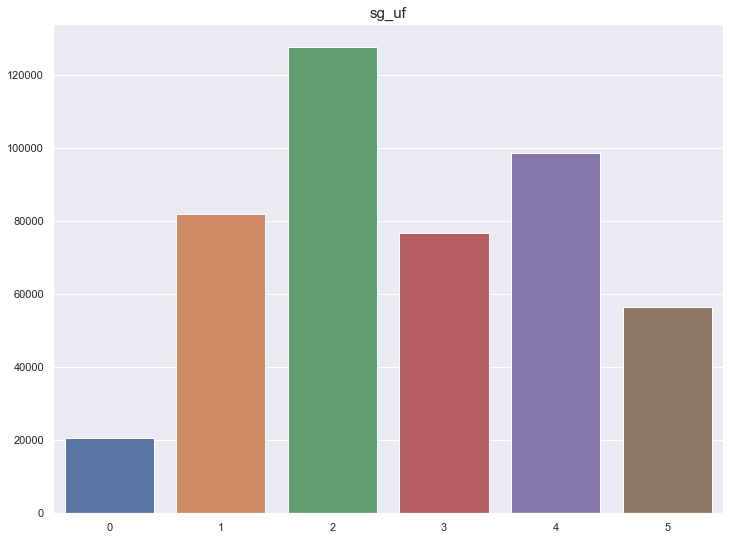

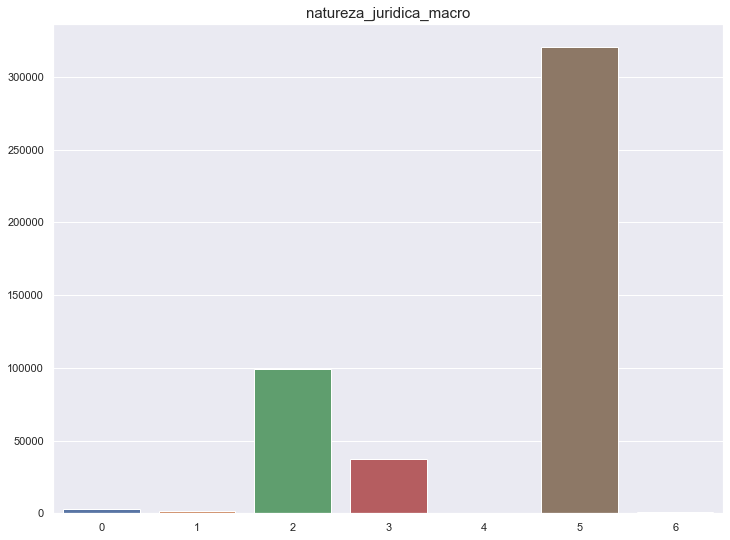

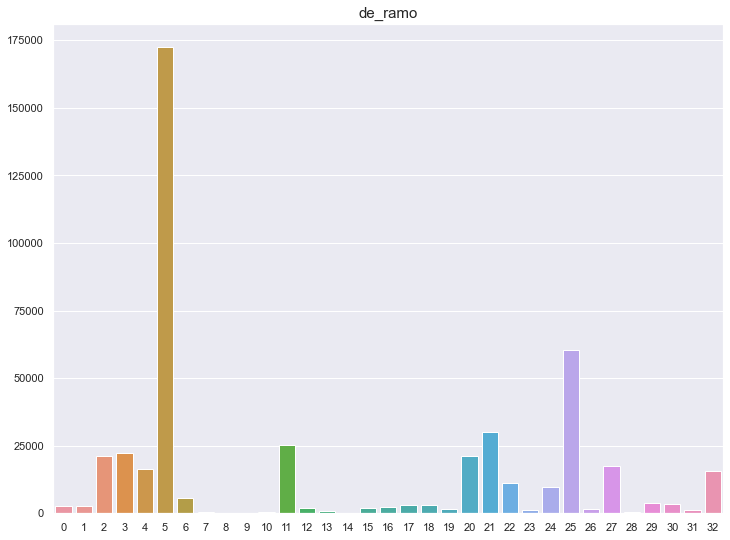

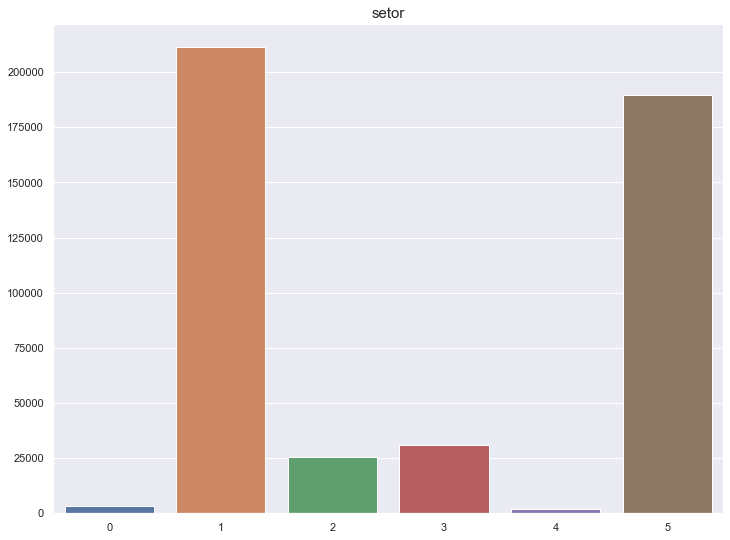

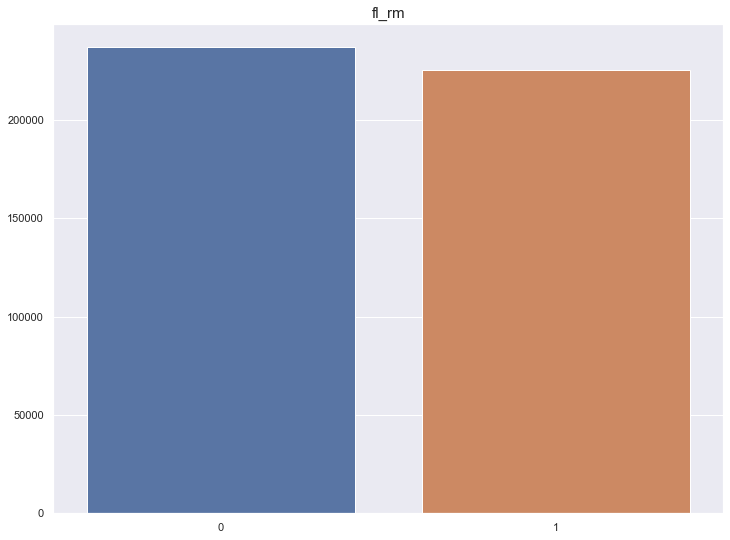

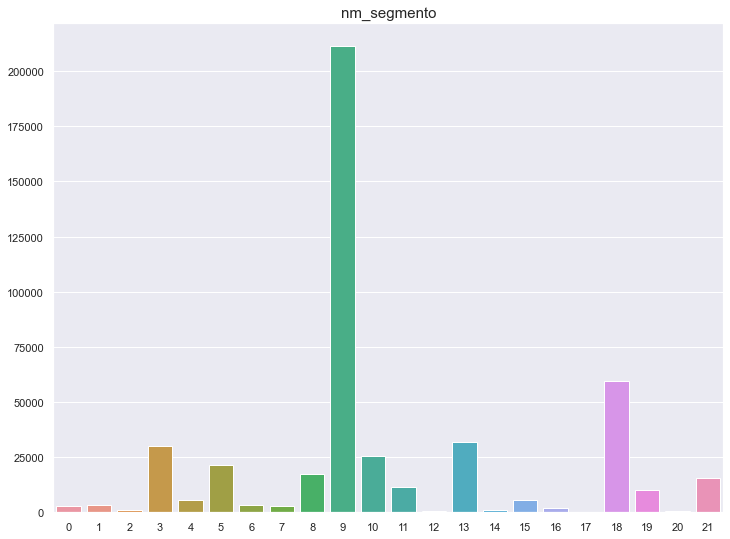

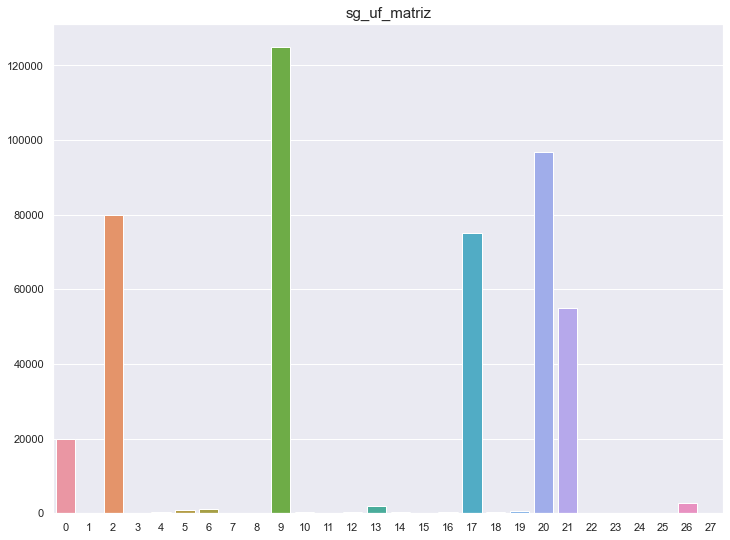

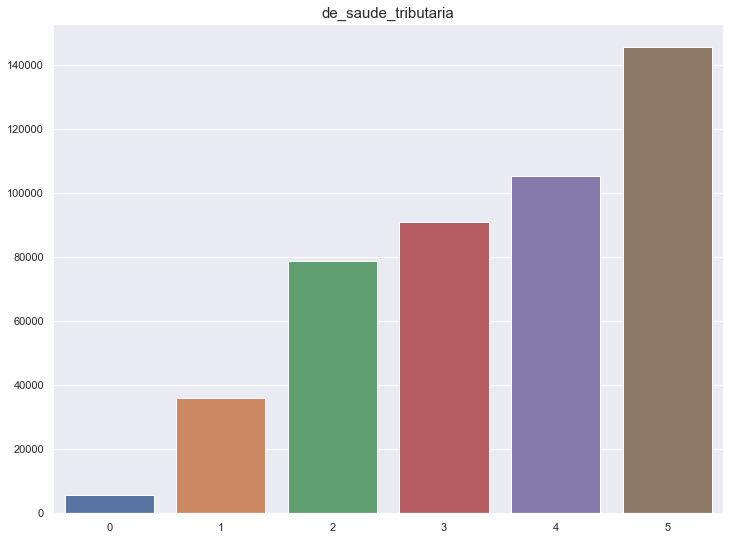

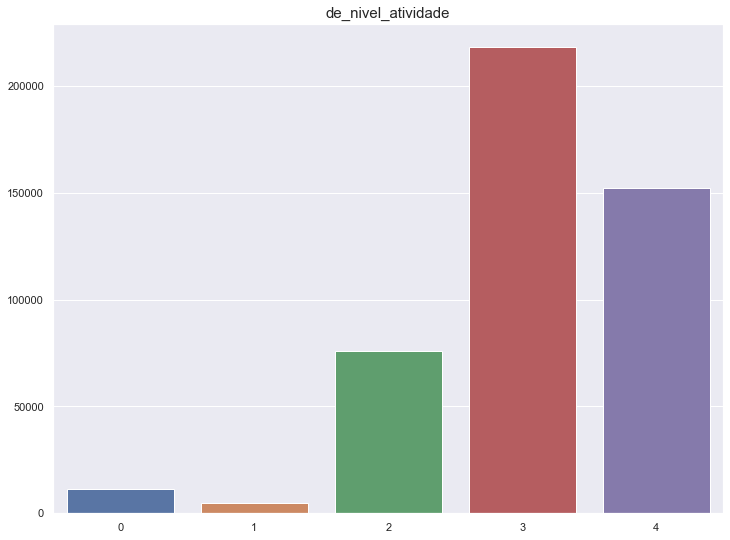

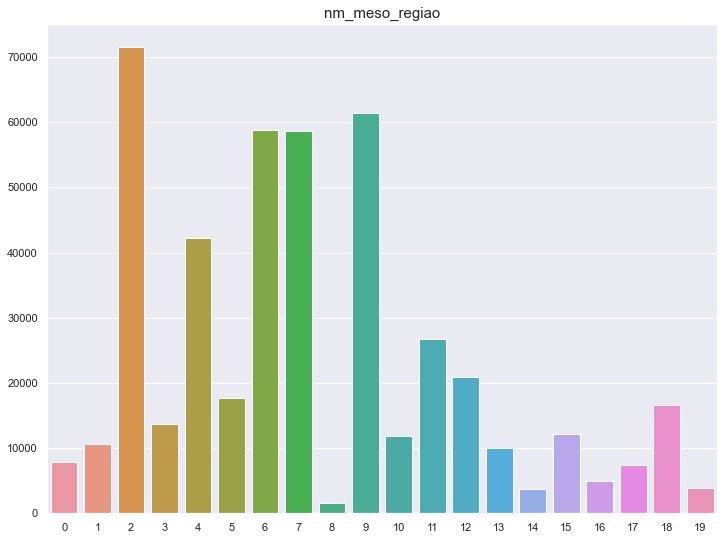

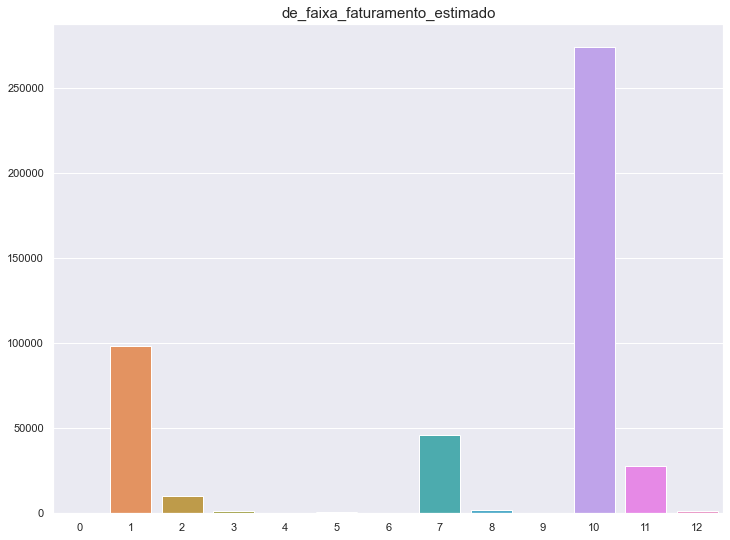

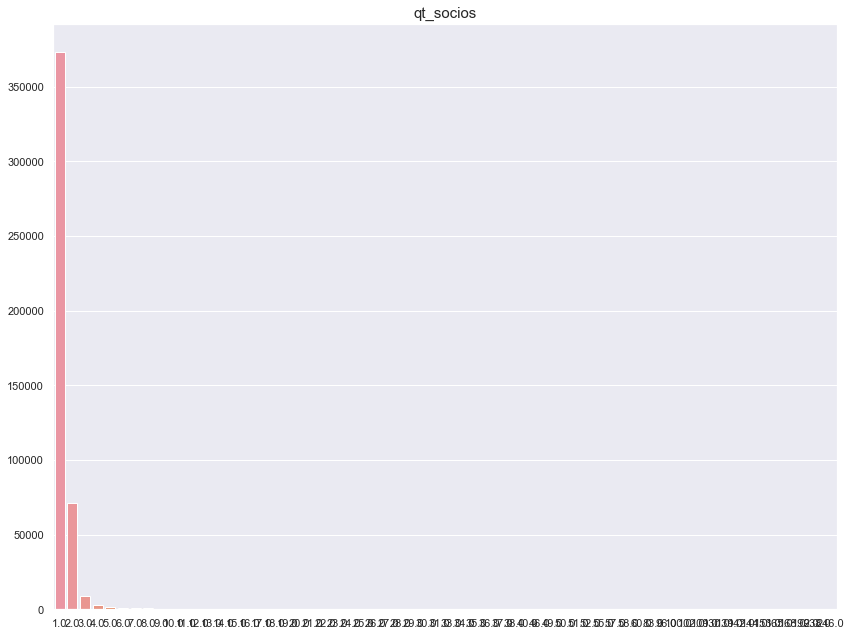

In [39]:
# visualizing the data enconded
for i, j in enumerate(market_filter.columns):
    plt.figure(i)
    plt.title(j)
    sns.countplot(market_filter[j])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(j, {'fontsize': 15})
plt.tight_layout()

In [40]:
#saving the data for the next step
market_filter.to_csv('market_cleaned.csv')

#### Disclaimer:

The visualisation of the raw data was made using the pandas profiling tool. The report is available in this project's folder